In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Read Data

In [2]:
#TRAFFIC INCIDENTS
traffic_incidents = pd.read_csv("CSV/Traffic_Incidents.csv")
traffic_incidents['START_DT'] = pd.to_datetime(traffic_incidents['START_DT'])
traffic_incidents = traffic_incidents.loc[traffic_incidents["START_DT"].dt.year == 2018, :]

#WEATHER
weather_2018 = pd.read_csv("https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=50430&Year=2018&Month=1&Day=1&timeframe=2&submit=Download+Data", 
                          parse_dates = [4], date_parser = pd.to_datetime, index_col = [4])

#VISIBILITY
vis_url = "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=50430&Year=2018&Month={i}&Day=1&timeframe=1&submit=Download+Data"
visibility_2018 = pd.DataFrame()

for i in range(1,13):
    df = pd.read_csv(vis_url.format(i = i), parse_dates = [4], date_parser = pd.to_datetime, index_col = [4])
    visibility_2018 = visibility_2018.append(df)

### Process Data

In [3]:
#Traffic Incidents
traffic_incidents = traffic_incidents.rename(columns = {'START_DT' : 'Date/Time'}) 
traffic_incidents = traffic_incidents.rename(columns = {'Count' : 'Daily Accident Count'}) 
traffic_incidents = traffic_incidents.set_index('Date/Time')
traffic_incidents = pd.DataFrame(traffic_incidents['Daily Accident Count'].resample('D').sum())

#Weather Data
weather_2018 = weather_2018.drop(['Year', 'Month', 'Day','Max Temp (°C)', 'Min Temp (°C)','Longitude (x)', 'Latitude (y)', 'Climate ID', 'Data Quality',
                                  'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
                                  'Cool Deg Days Flag', 'Cool Deg Days (°C)', 'Total Rain Flag', 'Total Snow Flag','Total Precip Flag',
                                 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
                                  'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'], axis = 1)

visibility_2018 = visibility_2018[['Station Name', 'Temp (°C)','Dew Point Temp (°C)','Rel Hum (%)','Wind Spd (km/h)','Visibility (km)',
                                    'Wind Chill', 'Weather']]

#Resample visibility data to calculate daily mean of categories
visibility_2018 = visibility_2018.resample('D').mean()

display(traffic_incidents, weather_2018, visibility_2018)

Daily Accident Count
Date/Time                       
2018-01-01                    12
2018-01-02                    30
2018-01-03                    26
2018-01-04                    22
2018-01-05                    20
...                          ...
2018-12-27                    21
2018-12-28                    10
2018-12-29                     4
2018-12-30                    11
2018-12-31                    13

[365 rows x 1 columns]

Station Name  Mean Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
Date/Time                                                                      
2018-01-01  CALGARY INTL A           -15.8              0.0              0.0   
2018-01-02  CALGARY INTL A            -4.5              0.0              0.0   
2018-01-03  CALGARY INTL A            -2.5              0.0              0.0   
2018-01-04  CALGARY INTL A            -4.9              0.0              0.0   
2018-01-05  CALGARY INTL A            -1.3              0.0              0.0   
...                    ...             ...              ...              ...   
2018-12-27  CALGARY INTL A            -7.3              0.0              1.0   
2018-12-28  CALGARY INTL A            -5.6              0.0              0.0   
2018-12-29  CALGARY INTL A             2.6              0.0              0.0   
2018-12-30  CALGARY INTL A            -4.9              0.0              1.3   
2018-12-31  CALGARY INTL A           -11.4              0.0              0.0   

            Total Precip (mm)  Snow on Grnd (cm)  
Date/Time                                         
2018-01-01                0.0               18.0  
2018-01-02                0.0               17.0  
2018-01-03                0.0               16.0  
2018-01-04                0.0               14.0  
2018-01-05                0.0               10.0  
...                       ...                ...  
2018-12-27                0.8                4.0  
2018-12-28                0.0                4.0  
2018-12-29                0.0                4.0  
2018-12-30                0.9                4.0  
2018-12-31                0.0                4.0  

[365 rows x 6 columns]

Temp (°C)  Dew Point Temp (°C)  Rel Hum (%)  Wind Spd (km/h)  \
Date/Time                                                                  
2018-01-01 -16.683333           -22.166667    64.750000         7.083333   
2018-01-02  -3.787500           -10.108333    62.125000         6.166667   
2018-01-03  -2.391667            -7.120833    71.083333         4.500000   
2018-01-04  -5.016667            -8.591667    77.333333         4.416667   
2018-01-05  -0.345833            -5.733333    69.541667         9.583333   
...               ...                  ...          ...              ...   
2018-12-27  -7.225000            -9.450000    84.541667         8.625000   
2018-12-28  -4.633333           -12.187500    57.750000        12.000000   
2018-12-29   1.600000            -7.441667    52.708333        13.250000   
2018-12-30  -7.066667           -10.537500    77.208333        25.333333   
2018-12-31 -11.916667           -16.079167    72.125000        11.041667   

            Visibility (km)  Wind Chill  
Date/Time                                
2018-01-01        42.570833  -21.083333  
2018-01-02        40.891667   -7.200000  
2018-01-03        39.212500   -6.647059  
2018-01-04        40.891667   -8.526316  
2018-01-05        40.891667  -10.454545  
...                     ...         ...  
2018-12-27        12.650000  -11.375000  
2018-12-28        40.891667  -10.055556  
2018-12-29        38.475000   -5.400000  
2018-12-30        16.958333  -16.904762  
2018-12-31        38.145833  -17.708333  

[365 rows x 6 columns]

In [4]:
weather_combined = pd.merge(weather_2018, visibility_2018, left_index = True, right_index = True, sort = True)
weather_combined = pd.merge(weather_combined, traffic_incidents, left_index = True, right_index = True, sort = True)

first_col = weather_combined.pop('Daily Accident Count')
weather_combined.insert(1, 'Daily Accident Count', first_col)

display(weather_combined)

Station Name  Daily Accident Count  Mean Temp (°C)  \
Date/Time                                                          
2018-01-01  CALGARY INTL A                    12           -15.8   
2018-01-02  CALGARY INTL A                    30            -4.5   
2018-01-03  CALGARY INTL A                    26            -2.5   
2018-01-04  CALGARY INTL A                    22            -4.9   
2018-01-05  CALGARY INTL A                    20            -1.3   
...                    ...                   ...             ...   
2018-12-27  CALGARY INTL A                    21            -7.3   
2018-12-28  CALGARY INTL A                    10            -5.6   
2018-12-29  CALGARY INTL A                     4             2.6   
2018-12-30  CALGARY INTL A                    11            -4.9   
2018-12-31  CALGARY INTL A                    13           -11.4   

            Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
Date/Time                                                         
2018-01-01              0.0              0.0                0.0   
2018-01-02              0.0              0.0                0.0   
2018-01-03              0.0              0.0                0.0   
2018-01-04              0.0              0.0                0.0   
2018-01-05              0.0              0.0                0.0   
...                     ...              ...                ...   
2018-12-27              0.0              1.0                0.8   
2018-12-28              0.0              0.0                0.0   
2018-12-29              0.0              0.0                0.0   
2018-12-30              0.0              1.3                0.9   
2018-12-31              0.0              0.0                0.0   

            Snow on Grnd (cm)  Temp (°C)  Dew Point Temp (°C)  Rel Hum (%)  \
Date/Time                                                                    
2018-01-01               18.0 -16.683333           -22.166667    64.750000   
2018-01-02               17.0  -3.787500           -10.108333    62.125000   
2018-01-03               16.0  -2.391667            -7.120833    71.083333   
2018-01-04               14.0  -5.016667            -8.591667    77.333333   
2018-01-05               10.0  -0.345833            -5.733333    69.541667   
...                       ...        ...                  ...          ...   
2018-12-27                4.0  -7.225000            -9.450000    84.541667   
2018-12-28                4.0  -4.633333           -12.187500    57.750000   
2018-12-29                4.0   1.600000            -7.441667    52.708333   
2018-12-30                4.0  -7.066667           -10.537500    77.208333   
2018-12-31                4.0 -11.916667           -16.079167    72.125000   

            Wind Spd (km/h)  Visibility (km)  Wind Chill  
Date/Time                                                 
2018-01-01         7.083333        42.570833  -21.083333  
2018-01-02         6.166667        40.891667   -7.200000  
2018-01-03         4.500000        39.212500   -6.647059  
2018-01-04         4.416667        40.891667   -8.526316  
2018-01-05         9.583333        40.891667  -10.454545  
...                     ...              ...         ...  
2018-12-27         8.625000        12.650000  -11.375000  
2018-12-28        12.000000        40.891667  -10.055556  
2018-12-29        13.250000        38.475000   -5.400000  
2018-12-30        25.333333        16.958333  -16.904762  
2018-12-31        11.041667        38.145833  -17.708333  

[365 rows x 13 columns]

In [5]:
incident_factors = pd.read_csv("gridCSV.csv")
incident_factors = incident_factors.drop(['Unnamed: 0'], axis = 1)
incident_factors.loc[55]

minX                       51.027623
maxX                       51.064584
minY                     -114.087851
maxY                     -114.042261
accident                  465.000000
signals                   223.000000
cameras                    22.000000
SPEED                      35.833333
Average Speed Count        12.000000
VOLUME                  13595.419847
Average Volume Count      262.000000
Signs                   33465.000000
Name: 55, dtype: float64

## What is the relation between the number of accidents and the stated feature?

### Histogram, Scatter Plot, Line Graph, Heatmap, Correlations (Spearman rank)

## Average Speed Limit vs. Traffic Accidents

#### Heatmap

In [6]:
weather_combined
# average_speed_hist = incident_factors['SPEED'].hist()

# display(incident_factors['SPEED'].describe(), average_speed_hist)

Station Name  Daily Accident Count  Mean Temp (°C)  \
Date/Time                                                          
2018-01-01  CALGARY INTL A                    12           -15.8   
2018-01-02  CALGARY INTL A                    30            -4.5   
2018-01-03  CALGARY INTL A                    26            -2.5   
2018-01-04  CALGARY INTL A                    22            -4.9   
2018-01-05  CALGARY INTL A                    20            -1.3   
...                    ...                   ...             ...   
2018-12-27  CALGARY INTL A                    21            -7.3   
2018-12-28  CALGARY INTL A                    10            -5.6   
2018-12-29  CALGARY INTL A                     4             2.6   
2018-12-30  CALGARY INTL A                    11            -4.9   
2018-12-31  CALGARY INTL A                    13           -11.4   

            Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
Date/Time                                                         
2018-01-01              0.0              0.0                0.0   
2018-01-02              0.0              0.0                0.0   
2018-01-03              0.0              0.0                0.0   
2018-01-04              0.0              0.0                0.0   
2018-01-05              0.0              0.0                0.0   
...                     ...              ...                ...   
2018-12-27              0.0              1.0                0.8   
2018-12-28              0.0              0.0                0.0   
2018-12-29              0.0              0.0                0.0   
2018-12-30              0.0              1.3                0.9   
2018-12-31              0.0              0.0                0.0   

            Snow on Grnd (cm)  Temp (°C)  Dew Point Temp (°C)  Rel Hum (%)  \
Date/Time                                                                    
2018-01-01               18.0 -16.683333           -22.166667    64.750000   
2018-01-02               17.0  -3.787500           -10.108333    62.125000   
2018-01-03               16.0  -2.391667            -7.120833    71.083333   
2018-01-04               14.0  -5.016667            -8.591667    77.333333   
2018-01-05               10.0  -0.345833            -5.733333    69.541667   
...                       ...        ...                  ...          ...   
2018-12-27                4.0  -7.225000            -9.450000    84.541667   
2018-12-28                4.0  -4.633333           -12.187500    57.750000   
2018-12-29                4.0   1.600000            -7.441667    52.708333   
2018-12-30                4.0  -7.066667           -10.537500    77.208333   
2018-12-31                4.0 -11.916667           -16.079167    72.125000   

            Wind Spd (km/h)  Visibility (km)  Wind Chill  
Date/Time                                                 
2018-01-01         7.083333        42.570833  -21.083333  
2018-01-02         6.166667        40.891667   -7.200000  
2018-01-03         4.500000        39.212500   -6.647059  
2018-01-04         4.416667        40.891667   -8.526316  
2018-01-05         9.583333        40.891667  -10.454545  
...                     ...              ...         ...  
2018-12-27         8.625000        12.650000  -11.375000  
2018-12-28        12.000000        40.891667  -10.055556  
2018-12-29        13.250000        38.475000   -5.400000  
2018-12-30        25.333333        16.958333  -16.904762  
2018-12-31        11.041667        38.145833  -17.708333  

[365 rows x 13 columns]

In [41]:
incident_factors

minX       maxX        minY        maxY  accident  signals  cameras  \
0   50.842822  50.879782 -114.315796 -114.270207         0        0        0   
1   50.842822  50.879782 -114.270207 -114.224618         0        0        0   
2   50.842822  50.879782 -114.224618 -114.179029         0        0        0   
3   50.842822  50.879782 -114.179029 -114.133440         0        0        0   
4   50.842822  50.879782 -114.133440 -114.087851         0        0        0   
..        ...        ...         ...         ...       ...      ...      ...   
95  51.175465  51.212425 -114.087851 -114.042261         5        1        0   
96  51.175465  51.212425 -114.042261 -113.996672        22        0        0   
97  51.175465  51.212425 -113.996672 -113.951083        20        0        0   
98  51.175465  51.212425 -113.951083 -113.905494         1        0        0   
99  51.175465  51.212425 -113.905494 -113.859905         0        0        0   

        SPEED  Average Speed Count        VOLUME  Average Volume Count  Signs  
0    0.000000                    0      0.000000                     0      0  
1    0.000000                    0      0.000000                     0      0  
2    0.000000                    0      0.000000                     0      0  
3    0.000000                    0      0.000000                     0      0  
4    0.000000                    0      0.000000                     0     54  
..        ...                  ...           ...                   ...    ...  
95  70.000000                    2   2666.666667                     3    342  
96  73.636364                   11      0.000000                     0     52  
97  65.000000                   12  15000.000000                     1     27  
98   0.000000                    0      0.000000                     0      2  
99   0.000000                    0      0.000000                     0      0  

[100 rows x 12 columns]

## Average Traffic Volume vs. Traffic Accidents (Volume or Average Volume Count????)

In [48]:
incident_factors_volume = incident_factors[['accident', 'VOLUME']]
incident_factors_volume

accident        VOLUME
0          0      0.000000
1          0      0.000000
2          0      0.000000
3          0      0.000000
4          0      0.000000
..       ...           ...
95         5   2666.666667
96        22      0.000000
97        20  15000.000000
98         1      0.000000
99         0      0.000000

[100 rows x 2 columns]

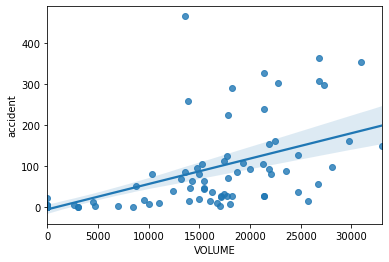

In [49]:
traffic_reg_plot = sns.regplot(x = 'VOLUME', y = 'accident', data = incident_factors_volume)

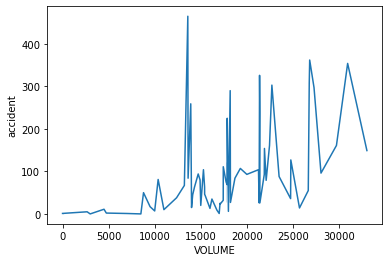

In [50]:
traffic_line_plot = sns.lineplot(x = 'VOLUME', y = 'accident', data = incident_factors_volume)

## Average Number of Traffic Cameras vs. Traffic Accidents

In [44]:
incident_factors_cameras = incident_factors[['accident', 'cameras']]
incident_factors_cameras

accident  cameras
0          0        0
1          0        0
2          0        0
3          0        0
4          0        0
..       ...      ...
95         5        0
96        22        0
97        20        0
98         1        0
99         0        0

[100 rows x 2 columns]

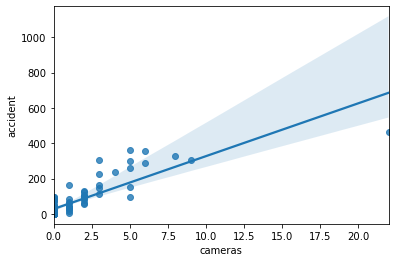

In [53]:
cameras_reg_plot = sns.regplot(x = 'cameras', y = 'accident', data = incident_factors_cameras)

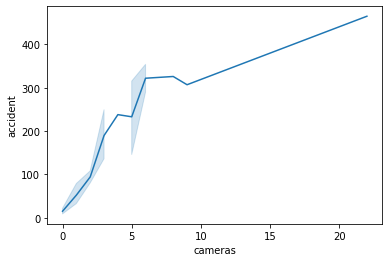

In [54]:
cameras_line_plot = sns.lineplot(x = 'cameras', y = 'accident', data = incident_factors_cameras)

## Average Number of Traffic Signals vs. Traffic Accidents

In [45]:
incident_factors_signals = incident_factors[['accident', 'signals']]
incident_factors_signals

accident  signals
0          0        0
1          0        0
2          0        0
3          0        0
4          0        0
..       ...      ...
95         5        1
96        22        0
97        20        0
98         1        0
99         0        0

[100 rows x 2 columns]

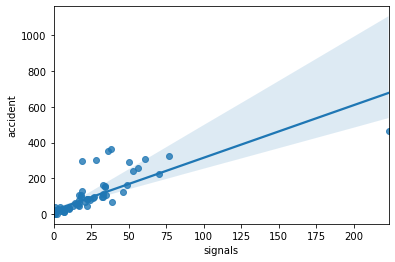

In [55]:
signals_reg_plot = sns.regplot(x = 'signals', y = 'accident', data = incident_factors_signals)

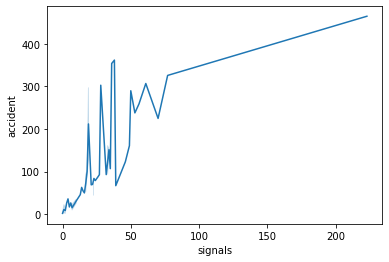

In [57]:
signals_line_plot = sns.lineplot(x = 'signals', y = 'accident', data = incident_factors_signals)

## Number of Traffic Signs vs. Traffic Accidents

In [46]:
incident_factors_signs = incident_factors[['accident', 'Signs']]
incident_factors_signs

accident  Signs
0          0      0
1          0      0
2          0      0
3          0      0
4          0     54
..       ...    ...
95         5    342
96        22     52
97        20     27
98         1      2
99         0      0

[100 rows x 2 columns]

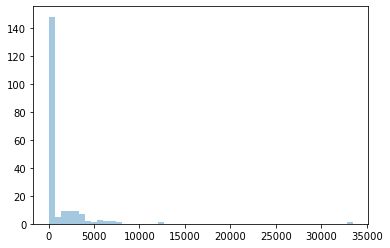

In [32]:
signs_hist = sns.distplot(incident_factors_signs, kde = False)

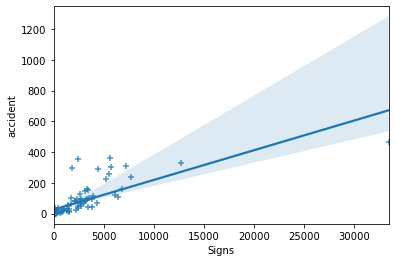

In [30]:
signs_reg_plot = sns.regplot(x = "Signs", y = 'accident', data = incident_factors_signs, marker = '+')

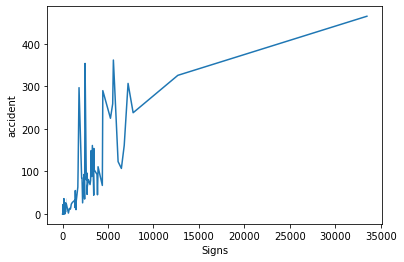

In [35]:
signs_line_plot = sns.lineplot(x = 'Signs', y = 'accident', data = incident_factors_signs)

## Daily Weather Condition vs. Traffic Accidents

In [8]:
# regplot(), lmplot(), jointplot()

### Snow vs. Accident

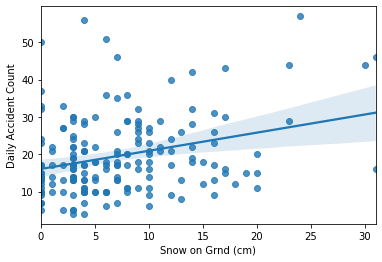

In [17]:
snow_reg_plot = sns.regplot(x = "Snow on Grnd (cm)", y = 'Daily Accident Count', data = weather_combined)

Comments: Positive correlation

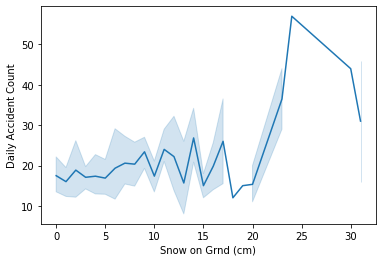

In [19]:
snow_line_plot = sns.lineplot(x = "Snow on Grnd (cm)", y = 'Daily Accident Count', data = weather_combined)

Comments: High spike in accidents when snow on ground surpasses 20 cm

### Mean Temperature vs. Accident

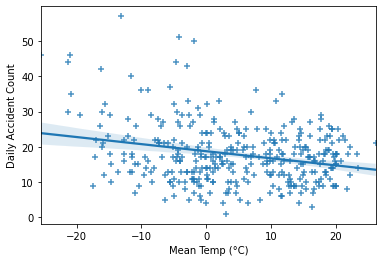

In [10]:
temp_reg_plot = sns.regplot(x = "Mean Temp (°C)", y = 'Daily Accident Count', data = weather_combined, marker = '+')

#### Regression Plot with bins

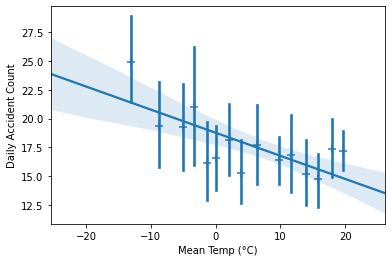

In [11]:
temp_reg_plot_bins = sns.regplot(x = "Mean Temp (°C)", y = 'Daily Accident Count', data = weather_combined, marker = '+', x_bins = 15)

#### Line Graph

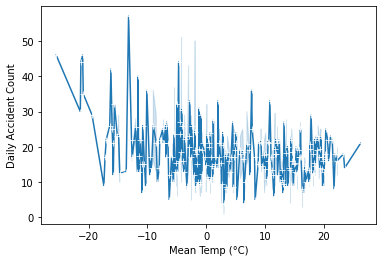

In [22]:
temp_reg_plot_bins = sns.lineplot(x = "Mean Temp (°C)", y = 'Daily Accident Count', data = weather_combined, marker = '+')

### Visibility vs. Accident

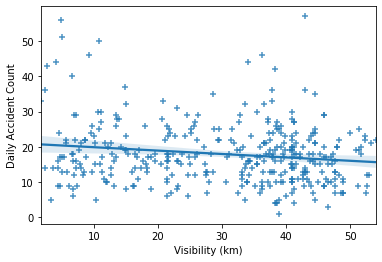

In [12]:
vis_reg_plot = sns.regplot(x = "Visibility (km)", y = 'Daily Accident Count', data = weather_combined, marker = '+')

#### Regression Plot with bins

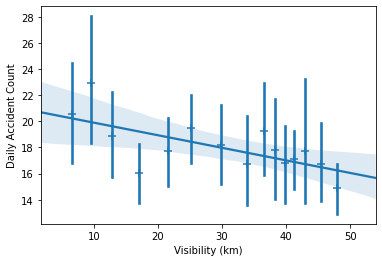

In [23]:
vis_reg_plot_bins = sns.regplot(x = "Visibility (km)", y = 'Daily Accident Count', data = weather_combined, marker = '+', x_bins = 15)

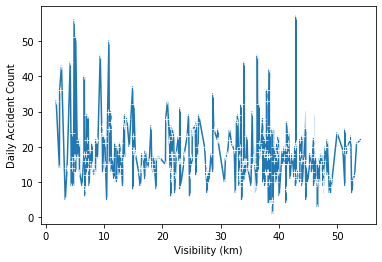

In [24]:
vis_line_plot_bins = sns.lineplot(x = "Visibility (km)", y = 'Daily Accident Count', data = weather_combined, marker = '+')

### Wind Speed vs. Accident

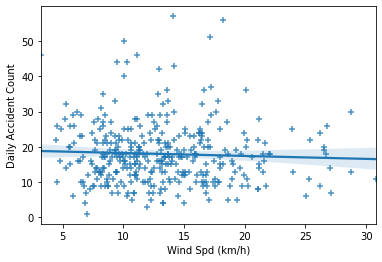

In [14]:
windspeed_reg_plot = sns.regplot(x = "Wind Spd (km/h)", y = 'Daily Accident Count', data = weather_combined, marker = '+')

#### Regression Plot with bins

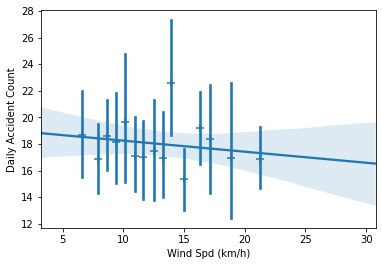

In [15]:
windspeed_reg_plot_bins = sns.regplot(x = "Wind Spd (km/h)", y = 'Daily Accident Count', data = weather_combined, marker = '+', x_bins = 15)

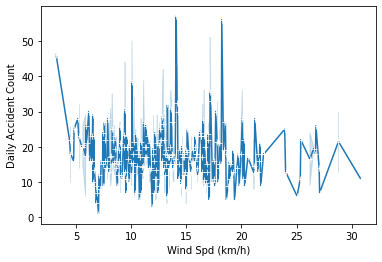

In [25]:
windspeed_line_plot_bins = sns.lineplot(x = "Wind Spd (km/h)", y = 'Daily Accident Count', data = weather_combined, marker = '+')